In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [10]:
x_train=pd.read_csv('../processed_data/x_train.csv',header=None)
y_train=pd.read_csv('../processed_data/y_train.csv',header=None)

x_test=pd.read_csv('../processed_data/x_test.csv',header=None)
y_test=pd.read_csv('../processed_data/y_test.csv',header=None)

In [11]:
print('Train percent anamolies:',str(np.round(y_train.mean(),4)*100)+'%')
print('Test percent anamolies:',str(np.round(y_test.mean(),4)*100)+'%')

Train percent anamolies: 0   2.930000
dtype: float64%
Test percent anamolies: 0   2.930000
dtype: float64%


In [12]:
x_train.apply(np.mean,axis=1)

0        0.042728
1        0.005352
2        0.005352
3        0.067171
4        0.005352
           ...   
402537   0.067171
402538   0.005352
402539   0.000753
402540   0.005352
402541   0.005352
Length: 402542, dtype: float64

In [13]:
x_train.apply(np.var,axis=1)

0        0.066931
1        0.001403
2        0.001403
3        0.223166
4        0.001403
           ...   
402537   0.223166
402538   0.001403
402539   0.000025
402540   0.001403
402541   0.001403
Length: 402542, dtype: float64

In [14]:
## Perform standardization

# Fit StandardScaler on training set
scaler=preprocessing.StandardScaler().fit(x_train)

# Apply standardization to train/test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Confirm that resulting data has zero mean and unit variance
print('Train mean:',x_train_scaled.mean(axis=0).mean())
print('Test mean:',x_test_scaled.mean(axis=0).mean())

print('Train std:',x_train_scaled.std(axis=0).mean())
print('Test std:',x_test_scaled.std(axis=0).mean())

Train mean: 0.007518796992481141
Test mean: -0.017431650851414026
Train std: 0.9924812030075187
Test std: 0.5746919839962779


In [15]:
# Reshape y datasets
y_train=y_train.values.reshape(len(y_train),)
y_test=y_test.values.reshape(len(y_test),)

In [16]:
# Perform PCA on scaled data
pca=PCA()
pca.fit(x_train_scaled)

PCA()

In [17]:
# Examine cumulative proportion of variance explained
print(pca.explained_variance_ratio_.cumsum())

[0.04706383 0.08986195 0.11778187 0.14299055 0.16662583 0.18935604
 0.21208337 0.2348107  0.25753803 0.28026536 0.30299269 0.32413372
 0.34437346 0.36425438 0.38408804 0.40343864 0.42225016 0.44072066
 0.45895319 0.47662308 0.49313377 0.50835979 0.52351332 0.53792873
 0.55177291 0.56471777 0.5775296  0.58957772 0.59990168 0.60998765
 0.61965265 0.62906325 0.63821154 0.64661659 0.65469883 0.66266717
 0.67056661 0.67843725 0.68610624 0.69369595 0.70127457 0.70885108
 0.71642695 0.72400276 0.73157855 0.73915434 0.74673013 0.75430591
 0.76188168 0.76945746 0.77703324 0.78460901 0.79218479 0.79976057
 0.80733634 0.81491212 0.8224879  0.83006367 0.83763945 0.84521523
 0.852791   0.86036678 0.86794255 0.87551833 0.88309411 0.89066988
 0.8982448  0.90581125 0.91332167 0.92070405 0.92793982 0.93505656
 0.9418     0.94687458 0.95172236 0.95592208 0.96004638 0.96379312
 0.96747906 0.97098501 0.97426185 0.97751505 0.98041122 0.98330485
 0.98605495 0.98876006 0.99121719 0.99364309 0.99538529 0.9970

In [18]:
num_components=np.argmax(pca.explained_variance_ratio_.cumsum()>=0.99)
print('# Components to explain 99% of variance:',num_components)

# Components to explain 99% of variance: 86


In [19]:
# Get component scores for train/test sets
x_train_scores=pca.transform(x_train_scaled)[:,:num_components]
x_test_scores=pca.transform(x_test_scaled)[:,:num_components]
print(x_train_scores.shape)
print(x_test_scores.shape)

(402542, 86)
(172519, 86)


In [21]:
# Perform logistic regression on component scores
logistic_regressor=LogisticRegression(max_iter=1000).fit(x_train_scores,y_train)

In [22]:
logistic_regressor.n_iter_

array([281], dtype=int32)

In [23]:
# Compute training metrics
print('Train logloss:',metrics.log_loss(y_train,logistic_regressor.predict(x_train_scores)))
print('Train accuracy:',metrics.accuracy_score(y_train,logistic_regressor.predict(x_train_scores)))
print('Train recall:',metrics.recall_score(y_train,logistic_regressor.predict(x_train_scores)))
print('Train precision:',metrics.precision_score(y_train,logistic_regressor.predict(x_train_scores)))
print('\n')
print('Test logloss:',metrics.log_loss(y_test,logistic_regressor.predict(x_test_scores)))
print('Test accuracy:',metrics.accuracy_score(y_test,logistic_regressor.predict(x_test_scores)))
print('Test recall:',metrics.recall_score(y_test,logistic_regressor.predict(x_test_scores)))
print('Test precision:',metrics.precision_score(y_test,logistic_regressor.predict(x_test_scores)))

Train logloss: 0.029687974203607463
Train accuracy: 0.9991404623616914
Train recall: 0.9960970643135924
Train precision: 0.9750830564784053


Test logloss: 0.009009137176562834
Test accuracy: 0.9997391591650775
Test recall: 0.9916864608076009
Test precision: 0.9994015559545183


## DECISION TREES


In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_scores,y_train)

[Text(238.5123046875, 209.07692307692307, 'X[12] <= 0.014\ngini = 0.057\nsamples = 402542\nvalue = [390756, 11786]'),
 Text(177.099609375, 192.35076923076923, 'X[77] <= -0.144\ngini = 0.02\nsamples = 394659\nvalue = [390731, 3928]'),
 Text(106.58671875, 175.62461538461537, 'X[83] <= -0.003\ngini = 0.225\nsamples = 3873\nvalue = [501, 3372]'),
 Text(72.36562500000001, 158.89846153846153, 'X[46] <= 0.0\ngini = 0.025\nsamples = 400\nvalue = [395, 5]'),
 Text(65.390625, 142.1723076923077, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(79.340625, 142.1723076923077, 'gini = 0.0\nsamples = 395\nvalue = [395, 0]'),
 Text(140.8078125, 158.89846153846153, 'X[68] <= -0.584\ngini = 0.059\nsamples = 3473\nvalue = [106, 3367]'),
 Text(93.290625, 142.1723076923077, 'X[24] <= 0.618\ngini = 0.037\nsamples = 3413\nvalue = [65, 3348]'),
 Text(54.056250000000006, 125.44615384615385, 'X[40] <= 0.047\ngini = 0.027\nsamples = 3372\nvalue = [47, 3325]'),
 Text(20.925, 108.72, 'X[46] <= 0.0\ngini = 0.231\ns

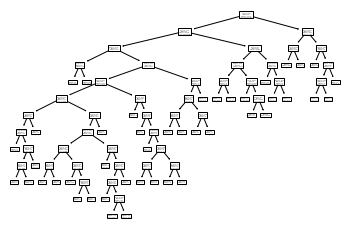

In [25]:
tree.plot_tree(clf)

In [26]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

In [28]:
metrics.log_loss(y_train,clf.predict(x_train_scores))

0.0030889217466438844

In [29]:
# Compute training metrics - Decision Tree classifier
print('Train logloss:',metrics.log_loss(y_train,clf.predict(x_train_scores)))
print('Train accuracy:',metrics.accuracy_score(y_train,clf.predict(x_train_scores)))
print('Train recall:',metrics.recall_score(y_train,clf.predict(x_train_scores)))
print('Train precision:',metrics.precision_score(y_train,clf.predict(x_train_scores)))
print('\n')
print('Test logloss:',metrics.log_loss(y_test,clf.predict(x_test_scores)))
print('Test accuracy:',metrics.accuracy_score(y_test,clf.predict(x_test_scores)))
print('Test recall:',metrics.recall_score(y_test,clf.predict(x_test_scores)))
print('Test precision:',metrics.precision_score(y_test,clf.predict(x_test_scores)))

Train logloss: 0.0030889217466438844
Train accuracy: 0.9999105683382107
Train recall: 0.9995757678601731
Train precision: 0.9973755502878429


Test logloss: 0.002002036663463964
Test accuracy: 0.9999420353700172
Test recall: 0.9984164687252574
Test precision: 0.9996036464526358
